In [ ]:
Anomaly detection is a process of finding thoserare items, data points, 
events or observations that make suspicions by being different from the rest data points or observations

Anomaly detection is also known as outlier detection

In [ ]:
Bank fraud, medical problems, malfunctioning equipment

In [ ]:
Types of Anomaly detection:
    
1. Point anomaly = atuple within the dataset can be said as a point anomaly if it is far away from the rest of the data
Eg: a sudden huge transaction of a huge amount from a credit card
    
2. Contextual anomaly: known as Conditional outliers. If a particular obs is different from other data points. 
    
3. Collective Anomaly: they occur when a data point within a set is anomalous for the whole dataset, 
    such values are collective outliers.

In [ ]:
Supervised Anomaly detection: needs labelled training data, both normal and anomalous data for creating predictive models
    KNN
    Bayesian network
    
    Advantages:
        capability of encoding interdependencies b/n variables of predicting events
        

In [ ]:
Unsupervised Anomaly Detection:does not require labelled training data.
    Assumptions:
        1. most of the ntwk connections are from Normal traffic, and only a small amount of data is abnormal
        2. Malicious traffic is statistically different from normal traffic
        
        Eg: self-organizing maps, k-means, c-means, expectation maximization, meta algorithm, SVM
            Helps in catching fraud, discovering strange activity in large and complex data sets
            
            Areas: banking services, natural sciences, medicine, marketing, ...

In [ ]:
Need of AD:
    1. Application performance
    2. Product quality
    3. User experience - gaming, online business

In [2]:
!pip install pyod

     -------------------------------------- 147.7/147.7 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyod: filename=pyod-1.0.7-py3-none-any.whl size=181085 sha256=2a8cb2340702ca38a61ba348bae01b50fa07b1d410c8f956bdd6145d08185359
  Stored in directory: c:\users\deepika\appdata\local\pip\cache\wheels\f4\1b\1a\a1d14cff28ea755d9c482bf64e2f349e1768504563856d7413
Successfully built pyod


In [4]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from pyod.models.knn import KNN
from pyod.utils.data import generate_data, get_outliers_inliers

In [ ]:
python lib for detecting outlying objects in multivariate data

In [16]:
X_train, y_train = generate_data(n_train = 300, train_only = True, n_features = 2)
outlier_fraction = 0.1

X_outliers, X_inliers = get_outliers_inliers(X_train, y_train)
n_inliers = len(X_inliers)
n_outliers = len(X_outliers)

f1 = X_train[:, [0]].reshape(-1,1)
f2 = X_train[:, [1]].reshape(-1,1)

Text(0, 0.5, 'Feature 2')

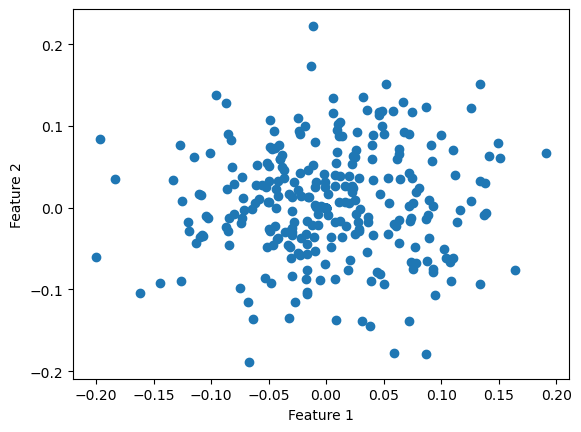

In [17]:
xx, yy = np.meshgrid(np.linspace(-10,10,200), np.linspace(-10,10,200))
plt.scatter(f1,f2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [20]:
clf = KNN(contamination = outlier_fraction)
clf.fit(X_train, y_train)

scores_pred = clf.decision_function(X_train)*-1

y_pred = clf.predict(X_train)
n_errors = (y_pred != y_train).sum()

print("no. of prediction errors is:" + str(n_errors))

no. of prediction errors is:53


C:\Users\DEEPIKA\anaconda3\lib\site-packages\pyod\models\base.py:431: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


In [22]:
import matplotlib.pyplot as plt

AttributeError: module 'matplotlib.pyplot' has no attribute 'font_manager'

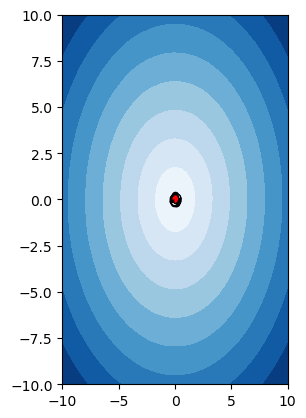

In [24]:
# threshold value to consider a
# datapoint inlier or outlier
threshold = stats.scoreatpercentile(scores_pred, 100 * outlier_fraction)

# decision function calculates the raw
# anomaly score for every point
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
Z = Z.reshape(xx.shape)

# fill blue colormap from minimum anomaly
# score to threshold value
subplot = plt.subplot(1, 2, 1)
subplot.contourf(xx, yy, Z, levels = np.linspace(Z.min(), threshold, 10), cmap = plt.cm.Blues_r)

# draw red contour line where anomaly
# score is equal to threshold
a = subplot.contour(xx, yy, Z, levels =[threshold], linewidths = 2, colors ='red')

# fill orange contour lines where range of anomaly
# score is from threshold to maximum anomaly score
subplot.contourf(xx, yy, Z, levels =[threshold, Z.max()], colors ='orange')

# scatter plot of inliers with white dots
b = subplot.scatter(X_train[:-n_outliers, 0], X_train[:-n_outliers, 1], c ='white', s = 20, edgecolor ='k')

# scatter plot of outliers with black dots
c = subplot.scatter(X_train[-n_outliers:, 0], X_train[-n_outliers:, 1], c ='black', s = 20, edgecolor ='k')
subplot.axis('tight')

subplot.legend([a.collections[0], b, c],['learned decision function', 'true inliers', 'true outliers'],prop = plt.font_manager.FontProperties(size = 10), loc ='lower right')

subplot.set_title('K-Nearest Neighbours')
subplot.set_xlim((-10, 10))
subplot.set_ylim((-10, 10))
plt.show()
